# Predicting Wine Quality

* Rich Alcabes
* Garrett Arnett


## Our Goal

* Create a REGRESSION model which will assign Quality_Score predictions to an unseen set of wines based upon specific drivers such as, alcohol content, volatile_acidity, chlorides, sulfates, etc...

## Our Plan

* Plan: Questions and Hypotheses
* Acquire: Obtain two distinct datasets (red wines/white wines) from https://data.world/food/wine-quality and combine both into a single datset with an attribute which indicates the wine_color.
* Prepare: Kept outliers, missingness was a non-issue, as there were ZERO entries containing NULL values for predictors. Split into ML subsets (Train/Validate/Test).
* Explore: Univariate and multi-variate analysis, correlation matrix, 2D and 3D visualization, correlation significance testing, 1-sample T-testing, K-Means clustering to discover meaningful sample segments (with associated MinMaxScaling).
* Model: With dataset scaled via MinMaxScaler, Initially, create an MVP model which is a Vanilla Multiple Linear Regression model specifically using ALCOHOL/DENSITY/VOLATILE_ACIDITY. Experiment with OLS Model hyperparameters
* Deliver: Please refer to this doc as well as the Final_Report.ipynb file for the finished version of the presentation, in addition to a brief 5-min presentation to the DS Team.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("tab10")
from scipy import stats
from sklearn.model_selection import train_test_split
import os
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import pandas as pd
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
seed = 1349
target = 'quality'
# python files
import final_wrangle as wr
import final_modeling as mo
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


## Acquire and Data Preperation

* 
*

In [2]:
train, validate, test = mo.wrangle()


In [3]:
train.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
fixed acidity,,,,,,,,,,,,
7.4,0.360,0.33,1.4,0.025,27.0,55.0,0.99150,3.21,0.33,11.2,6,0
5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,7,1
6.7,0.300,0.49,4.8,0.034,36.0,158.0,0.99450,3.12,0.45,9.9,6,0
6.0,0.160,0.27,12.0,0.030,39.0,98.0,0.99402,3.15,0.34,10.8,5,0
7.3,0.320,0.25,7.2,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,5,0


#### Steps taken to Prepare

* 
* 
* 

#### Results and Notes

* 
* 

|Feature |  Data type | Definition |
|---|---|---|
| alcohol: | float | measured as percentage |
| volatile_acidity: | float | greater values indicate vinegar-like taste |
| sulphates: | float | additive with antimicrobial/antioxidant properties |
| citric_acid: | float | a preservative with capacity to add flavor |
| total_SO2: | float | includes free_SO2 |
| density: | float | an indication of sugar/alcohol content |
| chlorides: | float | amount of salts present |
| fixed_acidity: | float | non-volatile acids not subject to evaporation |
| ph: | float | acidity-base measurement |
| free_SO2: | float | antimicrobial/antioxidant properties |
| residual_sugar: | float | measured to indicate sweetness |
| wine_color: | int | 1-Red / 0-White |
| quality: | int | TARGET: rating given by a wine-tasting professional |

## Explore

### 1.


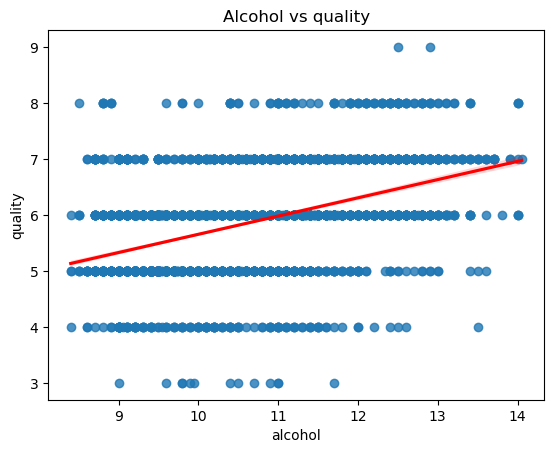

We reject the null hypothesis that alcohol has no coorelation with quality.


In [4]:
## Graph
sns.regplot(data=train, x='alcohol', y='quality', line_kws={'color':'red'})
plt.title('Alcohol vs quality')
plt.show()
r, p = stats.spearmanr(train.alcohol, train.quality)
alpha = 0.05
if p < alpha:
    print('We reject the null hypothesis that alcohol has no coorelation with quality.')
else:
    print('We cannot reject the null hypothesis that alcohol coorelates with quality.')

Explanation:

### 2. 


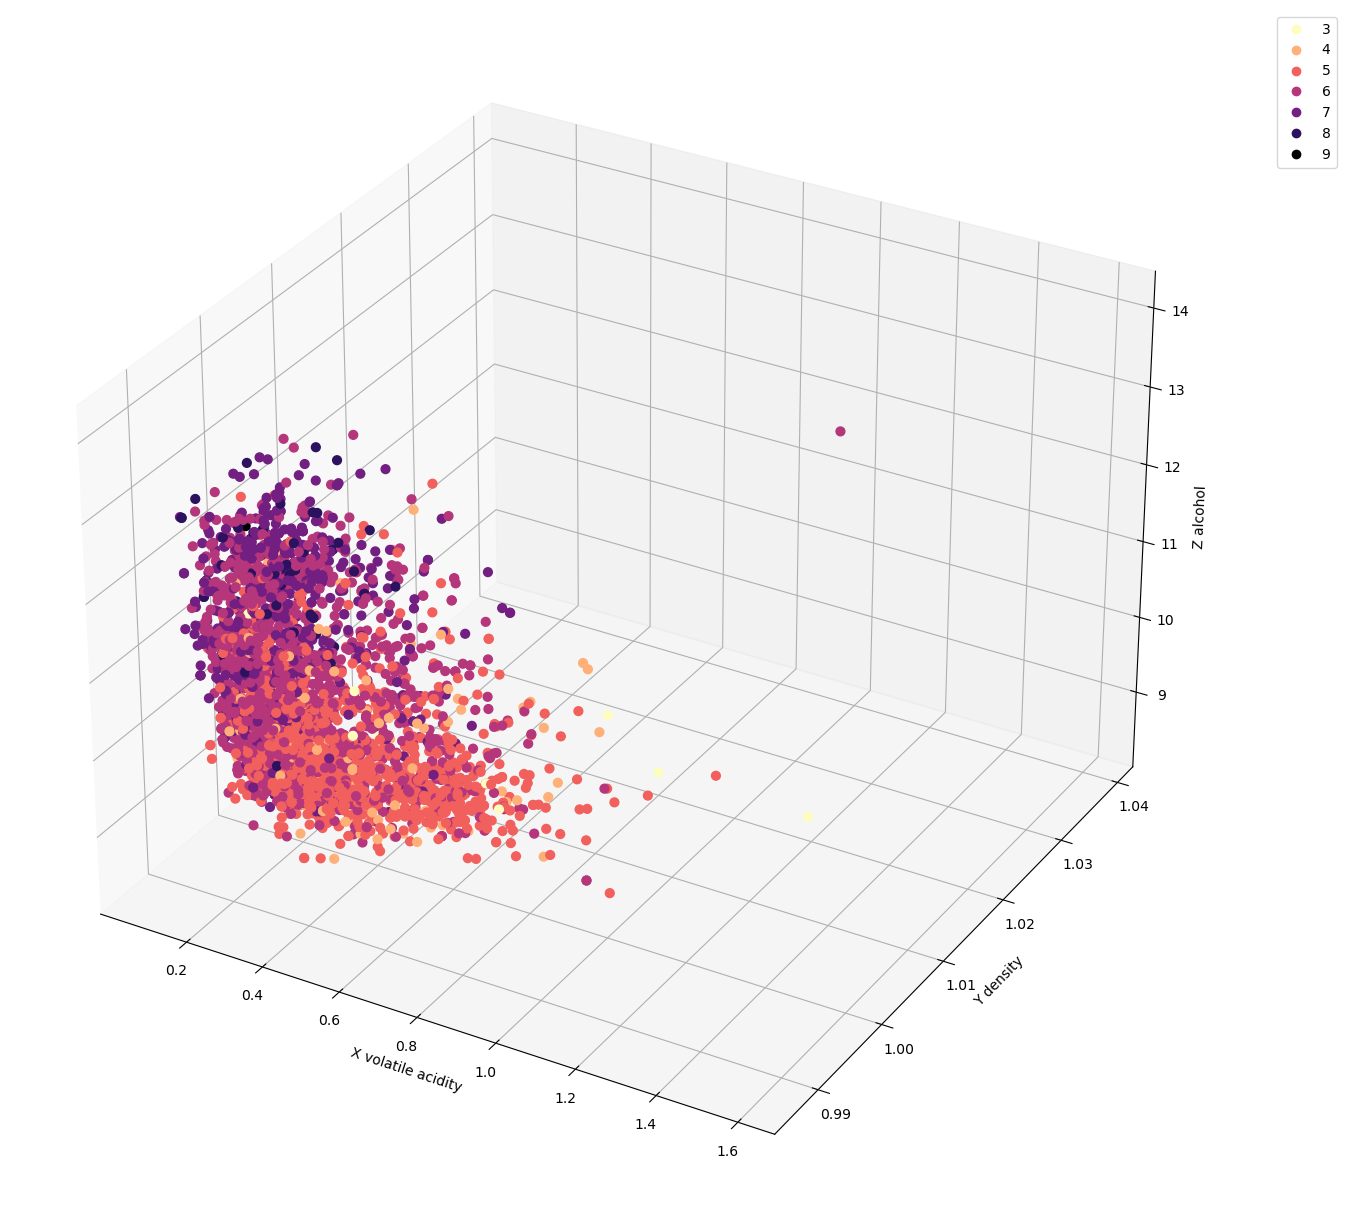

In [5]:
# graph
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("magma_r",256).as_hex())
sc = ax.scatter(train['volatile acidity'], train['density'], train['alcohol'],
                s=40, c=train.quality, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X volatile acidity')
ax.set_ylabel('Y density')
ax.set_zlabel('Z alcohol')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

explanation


## 3. 

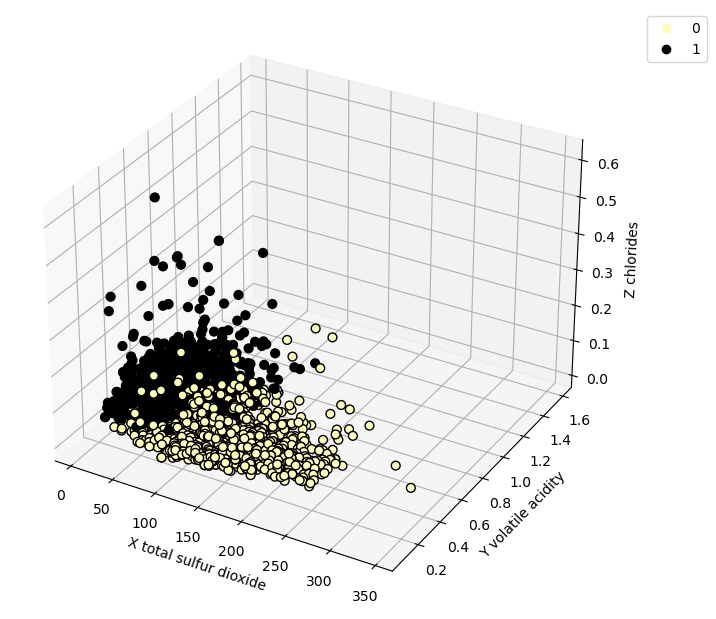

In [6]:
#graghfig = plt.figure(figsize=(6,6))
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("magma_r",256).as_hex())
sc = ax.scatter(train['total sulfur dioxide'], train['volatile acidity'], train['chlorides'],
                s=40, c=train.is_red, marker='o', cmap=cmap, alpha=1, ec='black')
ax.set_xlabel('X total sulfur dioxide')
ax.set_ylabel('Y volatile acidity')
ax.set_zlabel('Z chlorides')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

There is a stong positive coorelation between the price of the hosue and the square footage. Lets Confirm:

$H_0$: There is no linear correlation between home_value and sq_feet

$H_a$: There is a linear correlation between home_value and sq_feet

## 4. 

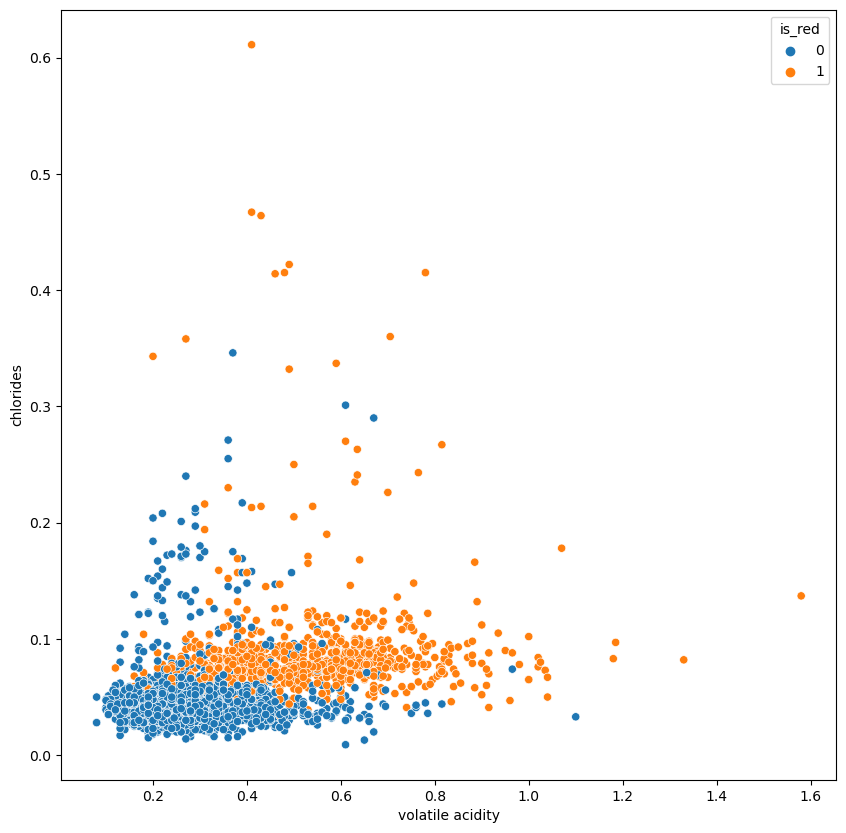

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(train['volatile acidity'], train['chlorides'] ,hue=train.is_red)
plt.title('')
plt.show()

explanation

## Explore Takaways

*
*
*
*

## Modeling

In [8]:
X_train, y_train, X_validate, y_validate, X_test, y_test = mo.train_validate_test(wr.prepare_mvp(),'quality')

In [9]:

# ESTABLISH BASELINE:
# convert y_targets into dataframe so that we can append additional columns to it
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

# Predict target_pred_mean-Baseline
target_pred_mean = y_train.quality.mean()
y_train['target_pred_mean'] = round(target_pred_mean,0)
y_validate['target_pred_mean'] = target_pred_mean

# 2. compute target_pred_median
target_pred_median = y_train.quality.median()
y_train['target_pred_median'] = target_pred_median
y_validate['target_pred_median'] = target_pred_median

#Calculate RMSE for Baseline:
rmse_train_mean = round(mean_squared_error(y_train.quality,
                                y_train.target_pred_mean) ** (.5),1)
rmse_validate_mean = round(mean_squared_error(y_validate.quality, y_validate.target_pred_mean) ** (0.5),1)

rmse_train_med = mean_squared_error(y_train.quality, y_train.target_pred_median) ** .5
rmse_validate_med = mean_squared_error(y_validate.quality, y_validate.target_pred_median) ** (0.5)

print(f"""RMSE using Mean
Train/In-Sample: {round(rmse_train_mean, 1)} 
Validate/Out-of-Sample: {round(rmse_validate_mean, 1)}""")
print(f"""RMSE using Median
Train/In-Sample: {round(rmse_train_med, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_med, 2)}""")

# USE MEAN as BASELINE

RMSE using Mean
Train/In-Sample: 0.9 
Validate/Out-of-Sample: 0.9
RMSE using Median
Train/In-Sample: 0.89 
Validate/Out-of-Sample: 0.91


## How I create models

I use four different regressors:

* Cat Boost Regressor with all features
* Generalized Liner Model with three freatures
* Gradient Boosting Regressor with all Features
* Random Forest Regressor with all Features



#### Root mean squared error
To evaluate the performance of the regression models I'm going to use the RMSE score.

Our data contains outliers. The difference betweence between the mean and median values is around $80K. That's why I decided to use the median value as my baseline model.

In [10]:
model_1_feats = ['alcohol',
                'volatile acidity',
                'density']
X_train_1 = X_train[model_1_feats]
X_validate_1 = X_validate[model_1_feats]
X_test_1 = X_test[model_1_feats]

# MAKE THE THING: create the model object
lm = LinearRegression()
# FIT THE THING: fit the model to training data
OLSmodel = lm.fit(X_train_1, y_train.quality)
# USE THE THING: make a prediction
y_train['target_pred_lm'] = lm.predict(X_train_1)
#Evaluate: RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.target_pred_lm)**(1/2)
# predict validate
y_validate['target_pred_lm'] = lm.predict(X_validate_1)
# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.quality, y_validate.target_pred_lm)**(1/2)
r2 = r2_score(y_validate.quality,y_validate.target_pred_lm)
print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}
Validate R2 Score: {r2}""")

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7436609095570794 
Validation/Out-of-Sample: 0.7557847149398662
Validate R2 Score: 0.278002837510938


In [11]:
CATb = CatBoostRegressor(verbose=False,depth=10)
CATb.fit(X_train,y_train.quality)
y_train['target_pred_CATb'] = CATb.predict(X_train)
CATb.predict(X_train)
#Evaluate: RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.target_pred_CATb)**(1/2)
#REPEAT STEPS 2-3
# predict validate
y_validate['target_pred_CATb'] = CATb.predict(X_validate)
# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.quality, y_validate.target_pred_CATb)**(1/2)
r2 = r2_score(y_validate.quality,y_validate.target_pred_CATb)
print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}
Validate R2 Score: {r2}""")

RMSE for OLS using LinearRegression
Training/In-Sample:  0.17022612101327936 
Validation/Out-of-Sample: 0.6172256509772919
Validate R2 Score: 0.5184657144176006


In [12]:
# run all models
# the results are stored in the md.scores data frame.
# this function also writes an *.csv file with the scores


In [13]:
# top 5 models
mo.gradient_boost_model()

,Gradient Bosting Regression,Scores
0,Features,"['volatile acidity', 'chlorides', 'density', '..."
1,RMSE Train Set,0.582405
2,RMSE Validation Set,0.684041
3,RMSE Test Set,0.690801
4,R2 Train Set,0.547583
5,R2 Validation Set,0.400344
6,R2 Test,0.385026
7,Beats a basline by:,22.9%


Text

In [14]:
mo.general_regressor_model()

,General Regressor Model,Scores
0,Features,"['volatile acidity', 'chlorides', 'density', '..."
1,RMSE Train Set,0.73359
2,RMSE Validation Set,0.762861
3,RMSE Test Set,0.744271
4,R2 Train Set,0.282213
5,R2 Validation Set,0.25419
6,R2 Test,0.286141
7,Beats a basline by:,16.9%


Text

Our winning model beat our baseline by 33.1%.

## Modeling summary

Observation of prediction results led me to the following conclusions:

* Gradient Boosting Regressor performed the best with our data set
* Gradient Boosting Regressor is a good model in terms of prediction but doesn't return stable results. The RMSE scores vary a lot in all 3 sets.
* Scaling type didn't affect the regression model's performance.



# Conclusions

* Overall my regression model performs good. Its predictions beat the baseline model by 33.1%
* For more stable results I would pick Random Forest Regressor or Lasso Lars Regressor.

# Next Steps

* To imporove prediction results I would recommend to pull more features from the database and look for the ones that have a strong correlation with the price in LA county.

* Also I would focus on making a model that is more stable than the current.